In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from sqlalchemy import create_engine, func 
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session

# Reflecting into SQLAlchemy ORM

In [2]:
engine = create_engine("sqlite:///database/hawaii.db")
session = Session(engine)

In [3]:
Base = automap_base()
Base.prepare(autoload_with=engine) # reflection

In [4]:
Base.classes.keys()

['measurement', 'station']

In [5]:
Station = Base.classes.station
Measurement = Base.classes.measurement

# Precipitation Analysis

In [6]:
most_recent_date = session.query(
    func.MAX(Measurement.date)
).scalar()

most_recent_date

'2017-08-23'

In [7]:
precipitation = session.query(
    Measurement.date,
    Measurement.prcp
).filter(
    Measurement.date >= "2016-08-23",
    Measurement.date <= "2017-08-23"
).all()

precipitation[:5]

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0)]

In [8]:
precipitation_df = pd.DataFrame(precipitation, columns=["date", "precipitation"])
precipitation_df = precipitation_df.sort_values("date")

precipitation_df.head()

,date,precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15


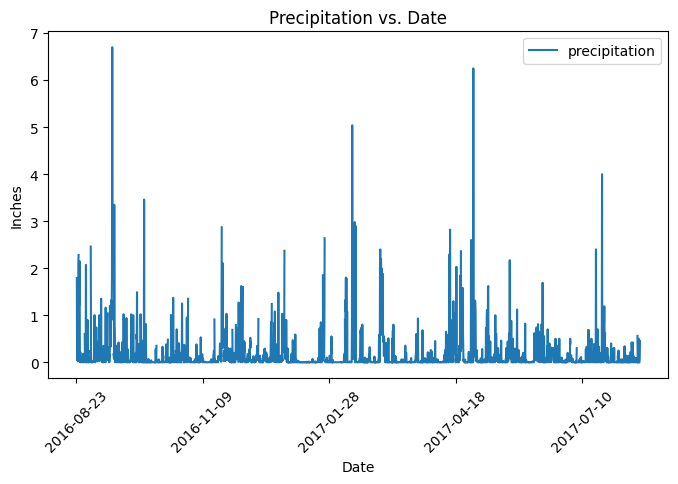

In [9]:
# figure
precipitation_df.plot(x="date", y="precipitation", figsize=(8, 4.5))

# formatting
plt.title("Precipitation vs. Date")
plt.xlabel("Date")
plt.ylabel("Inches")

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# show
plt.show()

# Station Analysis

In [10]:
total_num_stations = session.query(
    Station.station
).count()

total_num_stations

9

In [11]:
most_active_stations = session.query(
    Measurement.station,
    func.COUNT(Measurement.station)
).group_by(
    Measurement.station
).order_by(
    -func.count(Measurement.station)
).all()

most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [12]:
most_active_station_temperatures = session.query(
    func.MIN(Measurement.tobs),
    func.MAX(Measurement.tobs),
    func.AVG(Measurement.tobs)
).filter(
    Measurement.station == "USC00519281"
).all()

most_active_station_temperatures

[(54.0, 85.0, 71.66378066378067)]

In [13]:
temperature = session.query(
    Measurement.tobs
).filter(
    Measurement.station == "USC00519281",
    Measurement.date >= "2016-08-23",
    Measurement.date <= "2017-08-23"
).all()

temperature[:5]

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,)]

In [14]:
temperature_df = pd.DataFrame(temperature)

temperature_df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


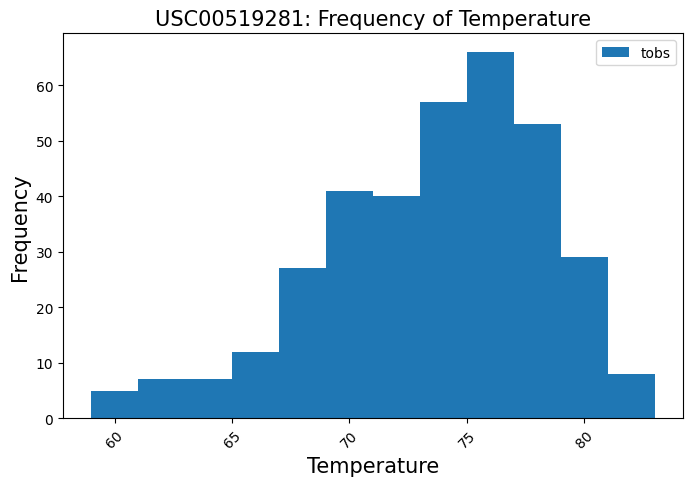

In [15]:
# figure
temperature_df.plot.hist(bins=12, figsize=(8, 5))

# formatting
plt.title("USC00519281: Frequency of Temperature", fontsize=15)
plt.xlabel("Temperature", fontsize=15)
plt.ylabel("Frequency", fontsize=15)

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# show
plt.show()

In [16]:
session.close()